# Análise de Dados SAF-T Padaria.
**Aluno:** Karen Pessoa

**Data:** 13/02/2026

**Curso:** Data Science na Prática - Fundamentos do Desenvolvimento de Modelos Analíticos em Python

Projeto: Análise de Vendas e Impostos
Este projeto tem como objetivo analisar um conjunto de dados de vendas e impostos para identificar padrões, tendências e insights que possam ajudar a empresa a otimizar suas operações e estratégias de vendas. O dataset inclui informações sobre transações de vendas, códigos de impostos, produtos e outras variáveis relevantes.

Clique aqui para acessar a documentação [(README)](readme_padaria.ipynb).

----------------------------------------------

### Parte 1: Exploração Inicial

In [1]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Carregando o dataset, verificando sheets e definindo sheet de trabalho
def load_data(path):
    df = pd.ExcelFile(path)
    return df

df_raw = load_data("SAF-T-RAW_v2.xlsx")

print(f"Abas encontradas: {df_raw.sheet_names}")

df_raw = df_raw.parse(0)


Abas encontradas: ['Folha1']


In [3]:
# Conferindo o tamanho do dataset
df_raw.shape

(86013, 62)

In [4]:
# Listando colunas do dataset
print(df_raw.columns.tolist())

['ns1:AuditFileVersion', 'ns1:TaxAccountingBasis', 'ns1:BusinessName', 'ns1:Country', 'ns1:FiscalYear', 'ns1:StartDate', 'ns1:EndDate', 'ns1:CurrencyCode', 'ns1:DateCreated', 'ns1:TaxEntity', 'ns1:SoftwareCertificateNumber', 'ns1:ProductVersion', 'ns1:Fax', 'ns1:Email', 'ns1:ProductType', 'ns1:ProductCode', 'ns1:ProductDescription', 'ns1:ProductNumberCode', 'ns1:TaxType', 'ns1:TaxCountryRegion', 'ns1:TaxCode', 'ns1:Description', 'ns1:TaxPercentage', 'ns1:TotalDebit', 'ns1:InvoiceStatus', 'ns1:InvoiceStatusDate', 'ns1:SourceID', 'ns1:SourceBilling', 'ns1:Hash', 'ns1:HashControl', 'ns1:Period', 'ns1:InvoiceDate', 'ns1:InvoiceType', 'ns1:SelfBillingIndicator26', 'ns1:CashVATSchemeIndicator', 'ns1:ThirdPartiesBillingIndicator', 'ns1:SourceID27', 'ns1:SystemEntryDate', 'ns1:DeliveryDate', 'ns1:DeliveryDate34', 'ns1:MovementStartTime', 'ns1:LineNumber', 'ns1:ProductCode40', 'ns1:ProductDescription41', 'ns1:Quantity', 'ns1:UnitOfMeasure', 'ns1:UnitPrice', 'ns1:TaxPointDate', 'ns1:Description4

In [5]:
# Visualizando primeiras linhas do dataset
df_raw.head(20)

,ns1:AuditFileVersion,ns1:TaxAccountingBasis,ns1:BusinessName,ns1:Country,ns1:FiscalYear,ns1:StartDate,ns1:EndDate,ns1:CurrencyCode,ns1:DateCreated,ns1:TaxEntity,...,ns1:TaxCode45,ns1:TaxPercentage46,ns1:TaxExemptionReason,ns1:TaxExemptionCode,ns1:TaxPayable,ns1:NetTotal,ns1:GrossTotal,ns1:PaymentMechanism,ns1:PaymentAmount,ns1:PaymentDate
0,1.04_01,F,NÃO DEFINIDO,PT,2024,2024-01-01,2024-12-08,EUR,2024-12-08,Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1.04_01,F,NÃO DEFINIDO,PT,2024,2024-01-01,2024-12-08,EUR,2024-12-08,Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1.04_01,F,NÃO DEFINIDO,PT,2024,2024-01-01,2024-12-08,EUR,2024-12-08,Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1.04_01,F,NÃO DEFINIDO,PT,2024,2024-01-01,2024-12-08,EUR,2024-12-08,Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1.04_01,F,NÃO DEFINIDO,PT,2024,2024-01-01,2024-12-08,EUR,2024-12-08,Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
5,1.04_01,F,NÃO DEFINIDO,PT,2024,2024-01-01,2024-12-08,EUR,2024-12-08,Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
6,1.04_01,F,NÃO DEFINIDO,PT,2024,2024-01-01,2024-12-08,EUR,2024-12-08,Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
7,1.04_01,F,NÃO DEFINIDO,PT,2024,2024-01-01,2024-12-08,EUR,2024-12-08,Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
8,1.04_01,F,NÃO DEFINIDO,PT,2024,2024-01-01,2024-12-08,EUR,2024-12-08,Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
9,1.04_01,F,NÃO DEFINIDO,PT,2024,2024-01-01,2024-12-08,EUR,2024-12-08,Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [6]:
# Verificando valores ausentes
df_raw.isna().sum().sort_values(ascending=False)

ns1:TaxCode             86009
ns1:TaxPercentage       86009
ns1:TaxType             86009
ns1:TaxCountryRegion    86009
ns1:Description         86009
                        ...  
ns1:TaxEntity               0
ns1:Fax                     0
ns1:Email                   0
ns1:FiscalYear              0
ns1:StartDate               0
Length: 62, dtype: int64

In [7]:
# Verificando valores únicos
df_raw.nunique()

ns1:AuditFileVersion         1
ns1:TaxAccountingBasis       1
ns1:BusinessName             1
ns1:Country                  1
ns1:FiscalYear               1
                          ... 
ns1:NetTotal              1432
ns1:GrossTotal            1367
ns1:PaymentMechanism         1
ns1:PaymentAmount         1367
ns1:PaymentDate            342
Length: 62, dtype: int64

### Parte 2: Limpeza e Reestruturação

In [8]:
# Padronizando colunas do dataset
def standardize_columns(df):
    df = df.copy()
    df.columns = df.columns.str.replace('ns1:', '', regex=False)
    return df

df_clean = standardize_columns(df_raw)


In [9]:
# Verificando remoção de prefixos 
print(df_clean.columns.tolist())


['AuditFileVersion', 'TaxAccountingBasis', 'BusinessName', 'Country', 'FiscalYear', 'StartDate', 'EndDate', 'CurrencyCode', 'DateCreated', 'TaxEntity', 'SoftwareCertificateNumber', 'ProductVersion', 'Fax', 'Email', 'ProductType', 'ProductCode', 'ProductDescription', 'ProductNumberCode', 'TaxType', 'TaxCountryRegion', 'TaxCode', 'Description', 'TaxPercentage', 'TotalDebit', 'InvoiceStatus', 'InvoiceStatusDate', 'SourceID', 'SourceBilling', 'Hash', 'HashControl', 'Period', 'InvoiceDate', 'InvoiceType', 'SelfBillingIndicator26', 'CashVATSchemeIndicator', 'ThirdPartiesBillingIndicator', 'SourceID27', 'SystemEntryDate', 'DeliveryDate', 'DeliveryDate34', 'MovementStartTime', 'LineNumber', 'ProductCode40', 'ProductDescription41', 'Quantity', 'UnitOfMeasure', 'UnitPrice', 'TaxPointDate', 'Description42', 'CreditAmount', 'TaxType43', 'TaxCountryRegion44', 'TaxCode45', 'TaxPercentage46', 'TaxExemptionReason', 'TaxExemptionCode', 'TaxPayable', 'NetTotal', 'GrossTotal', 'PaymentMechanism', 'Paymen

In [10]:
# Filtrando apenas as colunas relevantes para a análise

COLUNAS_SISTEMA = [
    'AuditFileVersion', 'TaxAccountingBasis', 'BusinessName',
    'Country', 'FiscalYear', 'StartDate', 'EndDate', 'CurrencyCode',
    'DateCreated', 'TaxEntity', 'SoftwareCertificateNumber',
    'ProductVersion', 'Fax', 'Email', 'ProductType',  'ProductNumberCode',
    'TotalDebit', 'InvoiceStatus', 'InvoiceStatusDate', 'SourceID', 
    'SourceBilling', 'Hash', 'HashControl', 'Period', 'InvoiceDate', 
    'InvoiceType', 'SelfBillingIndicator26', 'CashVATSchemeIndicator',
    'ThirdPartiesBillingIndicator', 'SystemEntryDate',
    'DeliveryDate', 'DeliveryDate34', 'TaxType43',
    'TaxCountryRegion44', 'PaymentMechanism'
]

def clean_data(df):
    cols_to_drop = [c for c in COLUNAS_SISTEMA if c in df.columns]
    df_clean = df.drop(columns=cols_to_drop)
    return df_clean

df_clean = clean_data(df_clean)

In [11]:
# Visualizando as colunas do dataset após a limpeza inicial
df_clean.columns

Index(['ProductCode', 'ProductDescription', 'TaxType', 'TaxCountryRegion',
       'TaxCode', 'Description', 'TaxPercentage', 'SourceID27',
       'MovementStartTime', 'LineNumber', 'ProductCode40',
       'ProductDescription41', 'Quantity', 'UnitOfMeasure', 'UnitPrice',
       'TaxPointDate', 'Description42', 'CreditAmount', 'TaxCode45',
       'TaxPercentage46', 'TaxExemptionReason', 'TaxExemptionCode',
       'TaxPayable', 'NetTotal', 'GrossTotal', 'PaymentAmount', 'PaymentDate'],
      dtype='str')

Subset Taxas IVA

In [12]:
# Construindo subset para taxas
tax_iva_cols = [
    'TaxType', 'TaxCountryRegion',
    'TaxCode', 'Description', 'TaxPercentage'
]

df_tax_iva = (
    df_clean[tax_iva_cols]
    .dropna(how='all')
    .drop_duplicates()
    .reset_index()
    .drop(columns='index')
)

df_tax_iva.head()

,TaxType,TaxCountryRegion,TaxCode,Description,TaxPercentage
0,IVA,PT,INT,Intermédia,13.0
1,IVA,PT,ISE,Isenta,0.0
2,IVA,PT,NOR,Normal,23.0
3,IVA,PT,RED,Reduzida,6.0


In [13]:
# Padronizando nomes das colunas do subset df_tax_iva
df_tax_iva.columns = ["Tipo", "País", "Código", "Descrição", "Percentagem"]
df_tax_iva.head()

,Tipo,País,Código,Descrição,Percentagem
0,IVA,PT,INT,Intermédia,13.0
1,IVA,PT,ISE,Isenta,0.0
2,IVA,PT,NOR,Normal,23.0
3,IVA,PT,RED,Reduzida,6.0


Subset Produtos

In [14]:
# Construindo subset para produtos
product_cols = [
    'ProductCode', 'ProductDescription'
]

df_products = (
    df_clean[product_cols]
    .dropna(how='all')
    .drop_duplicates()
    .sort_values(by='ProductCode')
    .reset_index()
    .drop(columns='index')
)

df_products.head()

,ProductCode,ProductDescription
0,1002,Coca-cola
1,1003,"Agua ,33 s/gas"
2,1004,Agua c/gas Frize
3,1005,"Agua s/gas 0,5l"
4,1007,Pão Caseiro Pequeno


In [15]:
# Padronizando nomes das colunas do subset df_products
df_products.columns = ["Código", "Descrição"]
df_products.head()

,Código,Descrição
0,1002,Coca-cola
1,1003,"Agua ,33 s/gas"
2,1004,Agua c/gas Frize
3,1005,"Agua s/gas 0,5l"
4,1007,Pão Caseiro Pequeno


In [16]:
# verificando produtos únicos no subset df_products
df_products.nunique()

Código       454
Descrição    428
dtype: int64

In [17]:
# Filtra as descrições que aparecem mais de uma vez no subset df_products
descricoes_repetidas = df_products[df_products['Descrição'].duplicated(keep=False)]

# Ordena por descrição para ver os códigos diferentes lado a lado
descricoes_repetidas = descricoes_repetidas.sort_values(by='Descrição')

print(descricoes_repetidas.shape)
print(descricoes_repetidas)

# apesar de ter sido encontrado produtos duplicados, eles não podem ser retirados do subset pois referem-se a códigos diferentes, ou seja, foram cadastrados mais de uma vez com diferentes códigos


(49, 2)
    Código                   Descrição
248   1657                      cevada
404   1935                      cevada
399   1929             chocolate milka
401   1931             chocolate milka
264   1690                  ferraduras
265   1691                  ferraduras
298   1760              ferrero rocher
352   1879              ferrero rocher
295   1749                    gelatina
266   1692                    gelatina
452   4501                 guardanapos
252   1666                 guardanapos
396   1926                    iced tea
397   1927                    iced tea
270  17,16                     ketchup
254   1668                     ketchup
360   1888                kinder bueno
353   1880                kinder bueno
447   1983                lucky strike
188   1508                lucky strike
446   1981                   maltesers
387   1917                   maltesers
432   1966                 milka choco
438   1973                 milka choco
333   1841       

Subset Vendas

In [18]:
# Construindo subset para vendas
cols_to_exclude = set(tax_iva_cols).union(set(product_cols))

df_sales = df_clean[[col for col in df_clean.columns if col not in cols_to_exclude]].copy()
df_sales.head()

,SourceID27,MovementStartTime,LineNumber,ProductCode40,ProductDescription41,Quantity,UnitOfMeasure,UnitPrice,TaxPointDate,Description42,CreditAmount,TaxCode45,TaxPercentage46,TaxExemptionReason,TaxExemptionCode,TaxPayable,NetTotal,GrossTotal,PaymentAmount,PaymentDate
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [19]:
# Checando tamanho do subset de vendas
df_sales.shape

(86013, 20)

In [20]:
# Checando os tipos de dados do subset de vendas
df_sales.dtypes

SourceID27                         str
MovementStartTime       datetime64[us]
LineNumber                     float64
ProductCode40                      str
ProductDescription41               str
Quantity                       float64
UnitOfMeasure                      str
UnitPrice                      float64
TaxPointDate            datetime64[us]
Description42                      str
CreditAmount                   float64
TaxCode45                          str
TaxPercentage46                float64
TaxExemptionReason                 str
TaxExemptionCode                   str
TaxPayable                     float64
NetTotal                       float64
GrossTotal                     float64
PaymentAmount                  float64
PaymentDate             datetime64[us]
dtype: object

In [21]:
# Checando valores ausentes do subset de vendas
df_sales.isna().sum().sort_values(ascending=False)

TaxExemptionReason      82625
TaxExemptionCode        82625
SourceID27                478
MovementStartTime         478
ProductCode40             478
LineNumber                478
ProductDescription41      478
Quantity                  478
TaxPointDate              478
Description42             478
UnitOfMeasure             478
UnitPrice                 478
TaxCode45                 478
CreditAmount              478
TaxPercentage46           478
TaxPayable                478
NetTotal                  478
GrossTotal                478
PaymentAmount             478
PaymentDate               478
dtype: int64

In [22]:
# Removendo linhas completamente vazias do subset de vendas
df_sales = df_sales.dropna(how='all')
df_sales.isna().sum().sort_values(ascending=False)
df_sales = df_sales.reset_index(drop=True) # reseta o index e o retira do subset

In [23]:
# Filtrando para manter apenas quantidades e preços maiores que zero do subset de vendas
df_sales = df_sales[(df_sales['Quantity'] > 0) & (df_sales['UnitPrice'] >= 0)]

In [24]:
# Ajustando a categoria de taxas fiscais do subset de vendas
mask_isento = df_sales['TaxCode45'] == 'ISE'

df_sales.loc[mask_isento, 'TaxCode45'] = (
    df_sales.loc[mask_isento, 'TaxCode45']
    + ' - '
    + df_sales.loc[mask_isento, 'TaxExemptionCode']
)
print(df_sales['TaxCode45'].value_counts())

TaxCode45
INT          36319
RED          31447
NOR          14381
ISE - M26     2446
ISE - M11      939
ISE - M05        3
Name: count, dtype: int64


In [25]:
# Removendo colunas de isenção fiscal que não serão mais necessárias no subset de vendas
df_sales = df_sales.drop(columns=['TaxExemptionReason', 'TaxExemptionCode'])
df_sales.isna().sum().sort_values(ascending=False)

SourceID27              0
MovementStartTime       0
LineNumber              0
ProductCode40           0
ProductDescription41    0
Quantity                0
UnitOfMeasure           0
UnitPrice               0
TaxPointDate            0
Description42           0
CreditAmount            0
TaxCode45               0
TaxPercentage46         0
TaxPayable              0
NetTotal                0
GrossTotal              0
PaymentAmount           0
PaymentDate             0
dtype: int64

In [26]:
# Checando tamanho do subset de vendas após limpeza
df_sales.shape

(85535, 18)

In [27]:
# Checando divergências entre as descrições dos produtos do subset de vendas
df_sales['test'] = (df_sales['ProductDescription41'] != df_sales['Description42'].str.upper()).astype(int)
df_divergentes = df_sales[df_sales['test'] == 1]
print(df_divergentes[['ProductDescription41', 'Description42', 'test']])

      ProductDescription41 Description42  test
54328  PÃO CASEIRO PEQUENO          1,35     1


In [28]:
# Ajustando as descrições dos produtos para o mesmo formato no subset de vendas
df_sales['Description42'] = df_sales['ProductDescription41'].str.title()
df_sales['ProductDescription41'] = df_sales['ProductDescription41'].str.title()
print(df_sales[['ProductDescription41', 'Description42', 'test']])

      ProductDescription41        Description42  test
0      Pão Caseiro Pequeno  Pão Caseiro Pequeno     0
1           Cacete / Viana       Cacete / Viana     0
2             Bola Caseira         Bola Caseira     0
3      Pão Caseiro Pequeno  Pão Caseiro Pequeno     0
4                     Café                 Café     0
...                    ...                  ...   ...
85530                 Fofa                 Fofa     0
85531         Bola Caseira         Bola Caseira     0
85532                 Fofa                 Fofa     0
85533  Pão Caseiro Pequeno  Pão Caseiro Pequeno     0
85534      Agua S/Gas 0,5L      Agua S/Gas 0,5L     0

[85535 rows x 3 columns]


In [29]:
# Removendo a coluna test do subset de vendas
df_sales = df_sales.drop(columns=['Description42', 'test'])

In [30]:
# Verificando colunas do subset de vendas antes da exportação
print(df_sales.columns.tolist())

['SourceID27', 'MovementStartTime', 'LineNumber', 'ProductCode40', 'ProductDescription41', 'Quantity', 'UnitOfMeasure', 'UnitPrice', 'TaxPointDate', 'CreditAmount', 'TaxCode45', 'TaxPercentage46', 'TaxPayable', 'NetTotal', 'GrossTotal', 'PaymentAmount', 'PaymentDate']


### Parte 3: Criação de Ficheiro Estruturado 

In [31]:
# Preparar os dados para a sheet 'Resumo'
resumo_stats = {
    'Métrica': [
        'Data Inicial', 
        'Data Final', 
        'Total de Produtos Únicos', 
        'Total de Linhas de Venda', 
        'Dias com Vendas'
    ],
    'Valor': [
        df_sales['MovementStartTime'].min(),
        df_sales['MovementStartTime'].max(),
        df_products['Descrição'].nunique(),
        len(df_sales),
        df_sales['MovementStartTime'].dt.date.nunique()
    ]
}
df_resumo = pd.DataFrame(resumo_stats)

df_resumo.head()



,Métrica,Valor
0,Data Inicial,2024-01-02 11:21:00
1,Data Final,2024-12-08 19:01:00
2,Total de Produtos Únicos,428
3,Total de Linhas de Venda,85535
4,Dias com Vendas,342


In [32]:
#  Criar o arquivo Excel com múltiplas abas
with pd.ExcelWriter('SAF-T-LIMPO.xlsx', engine='openpyxl') as writer:
    df_products.to_excel(writer, sheet_name='Produtos', index=False)
    df_tax_iva.to_excel(writer, sheet_name='IVA', index=False)
    df_sales.to_excel(writer, sheet_name='Vendas', index=False)
    df_resumo.to_excel(writer, sheet_name='Resumo', index=False)


### Parte 4: Análise Exploratória

In [33]:
# Criando a coluna de Valor Bruto Real (Faturamento por item) no subset de vendas
df_sales['GrossValue'] = (df_sales['UnitPrice'] * df_sales['Quantity']) * (100 + df_sales['TaxPercentage46']) / 100
df_sales['GrossValue'] = df_sales['GrossValue'].round(2)

In [38]:
# Criando colunas de data e hora a partir da coluna datetime
df_sales['Hora'] = df_sales["MovementStartTime"].dt.hour 
df_sales["Dia"] = df_sales["MovementStartTime"].dt.day 
df_sales["Dia_Semana"] = df_sales["MovementStartTime"].dt.day_of_week
df_sales["Mês"] = df_sales["MovementStartTime"].dt.month 
df_sales["Ano"] = df_sales["MovementStartTime"].dt.year

In [39]:
# Verifica estatísticas de preço, quantidade e valor final
print(df_sales[['UnitPrice', 'Quantity', 'GrossValue']].describe().round(2))

       UnitPrice  Quantity  GrossValue
count   85535.00  85535.00    85535.00
mean        1.11      1.50        1.58
std         1.03      1.43        1.45
min         0.00      0.00        0.00
25%         0.66      1.00        0.80
50%         0.89      1.00        1.30
75%         1.27      2.00        1.65
max        80.00    120.00       87.93


In [40]:
# Ver as 5 linhas com maior valor de venda para conferir se são reais
print(df_sales.nlargest(5, 'GrossValue'))

      SourceID27   MovementStartTime  LineNumber ProductCode40  \
72823        EB1 2024-10-18 09:54:00         1.0          1437   
4490          EB 2024-01-24 07:38:00         1.0          1014   
76689         EB 2024-11-02 08:44:00         1.0          1252   
83967         EB 2024-12-01 17:21:00         1.0          1012   
79097        EB1 2024-11-11 20:16:00         1.0          1427   

      ProductDescription41  Quantity UnitOfMeasure  UnitPrice TaxPointDate  \
72823             Chouriço      4.64       Unidade     15.407   2024-10-18   
4490           Broa Grande      1.00       Unidade     80.000   2024-01-24   
76689     Pão Com Chouriço     20.00       Unidade      1.549   2024-11-02   
83967                Bebés    120.00       Unidade      0.264   2024-12-01   
79097        Cerveja Média     23.00       Unidade      1.057   2024-11-11   

       CreditAmount  ... NetTotal  GrossTotal  PaymentAmount  PaymentDate  \
72823         71.49  ...    71.49       87.93          87

In [41]:
# Verificar os anos presentes no dataset
print(df_sales['Ano'].unique())

# Verificar se há alguma data fora do esperado
print(f"Data Mínima: {df_sales['MovementStartTime'].min()}")
print(f"Data Máxima: {df_sales['MovementStartTime'].max()}")

[2024]
Data Mínima: 2024-01-02 11:21:00
Data Máxima: 2024-12-08 19:01:00


In [42]:
# Verificando valores suspeitos no dataset
suspeitos_qtd = df_sales[df_sales['Quantity'] > 100]
suspeitos_preco = df_sales[df_sales['UnitPrice'] > 100]
print(f"Linhas suspeitas por quantidade: {len(suspeitos_qtd)}")
print(f"Linhas suspeitas por preço: {len(suspeitos_preco)}")

Linhas suspeitas por quantidade: 1
Linhas suspeitas por preço: 0


Análise Temporal

Vendas por mês

In [43]:
# Agrupando por mês e calculando as métricas
df_mensal = df_sales.groupby('Mês')['GrossValue'].agg(['sum', 'count', 'mean']).reset_index()

# Renomeando para ficar claro
df_mensal.columns = ['Mês', 'Faturação_Total', 'Num_Transações', 'Ticket_Médio']

# Ordenar por mês (caso não esteja)
df_mensal = df_mensal.sort_values('Mês')

print(df_mensal)

    Mês  Faturação_Total  Num_Transações  Ticket_Médio
0     1          9637.04            6222      1.548865
1     2         10308.86            6759      1.525205
2     3         11095.13            6994      1.586378
3     4         11314.22            7145      1.583516
4     5         12087.06            7709      1.567915
5     6         12220.31            7743      1.578240
6     7         13289.80            8471      1.568858
7     8         13892.26            8586      1.618013
8     9         14176.08            8514      1.665032
9    10         13036.37            8235      1.583044
10   11         11380.80            7329      1.552845
11   12          2907.11            1828      1.590323


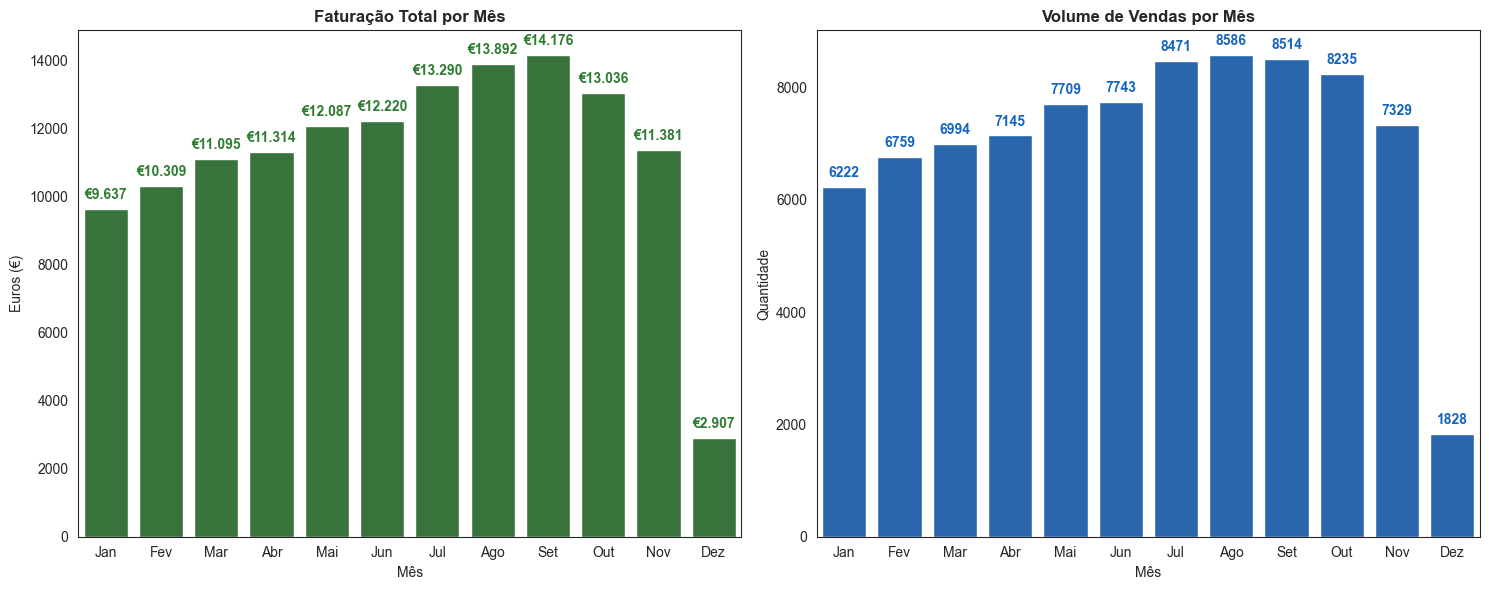

In [44]:
sns.set_style("white")

# Criando dicionário de tradução
meses_pt = {
    1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
    7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
}

# Criando a coluna com o nome (assumindo que tens a coluna 'Mês' com números)
df_mensal['Mês_Nome'] = df_mensal['Mês'].map(meses_pt)

# Gerando os gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Faturação (Verde)
bar1 = sns.barplot(data=df_mensal, x='Mês_Nome', y='Faturação_Total', ax=ax1, color='#2E7D32')
ax1.set_title('Faturação Total por Mês', fontsize=12, fontweight='bold')
ax1.set_xlabel('Mês')
ax1.set_ylabel('Euros (€)')

# Adicionando rótulos na Faturação
for p in bar1.patches:
    bar1.annotate(f'€{p.get_height():,.0f}'.replace(',', '.'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, 5), 
                   textcoords = 'offset points',
                   fontsize=10, fontweight='bold', color='#2E7D32')

# Gráfico 2: Número de Vendas (Azul)
bar2 = sns.barplot(data=df_mensal, x='Mês_Nome', y='Num_Transações', ax=ax2, color='#1565C0')
ax2.set_title('Volume de Vendas por Mês', fontsize=12, fontweight='bold')
ax2.set_xlabel('Mês')
ax2.set_ylabel('Quantidade')

# Adicionando rótulos no Volume
for p in bar2.patches:
    bar2.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, 5), 
                   textcoords = 'offset points',
                   fontsize=10, fontweight='bold', color='#1565C0')


plt.tight_layout()
plt.show()

Top produtos

In [45]:
# Agrupando por Produto
df_top_produtos = df_sales.groupby(['ProductDescription41']).agg({
    'Quantity': 'sum',
    'GrossValue': 'sum'
}).reset_index()

# Renomeando para facilitar
df_top_produtos.columns = ['Descrição', 'Quantidade_Total', 'Faturação_Total']

# Criando os dois Tops
top_10_faturacao = df_top_produtos.nlargest(10, 'Faturação_Total')
top_10_quantidade = df_top_produtos.nlargest(10, 'Quantidade_Total')

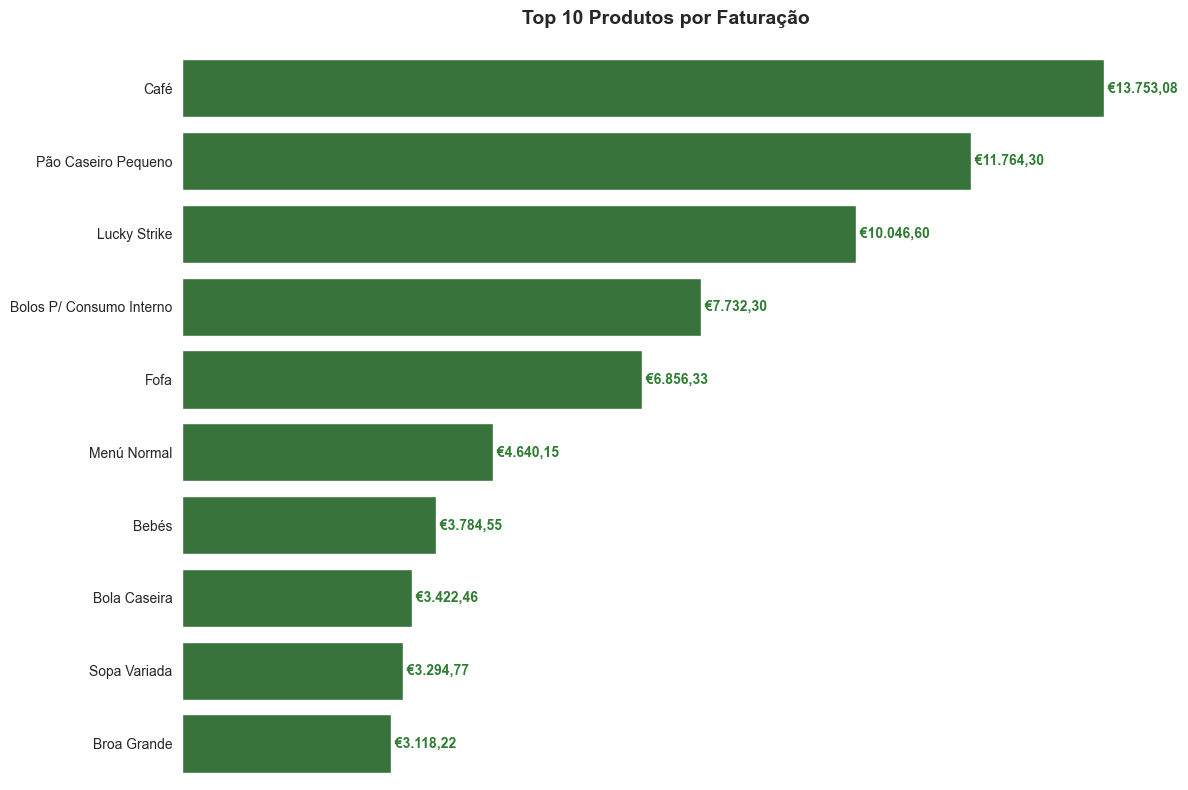

In [46]:
plt.figure(figsize=(12, 8))

# Criando o gráfico horizontal
bar_top = sns.barplot(
    data=top_10_faturacao, 
    x='Faturação_Total', 
    y='Descrição', 
    color='#2E7D32'
)

# Adicionando os rótulos de valor à frente das barras
for p in bar_top.patches:
    width = p.get_width()
    bar_top.annotate(f' €{width:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'), 
                     (width, p.get_y() + p.get_height() / 2.),
                     va='center', fontsize=10, fontweight='bold', color='#2E7D32')

# Estética minimalista
ax = plt.gca()
ax.grid(False)
sns.despine(left=True, bottom=True)
ax.set_xticks([]) # Remove o eixo X (os números já estão nas barras)
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Top 10 Produtos por Faturação', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

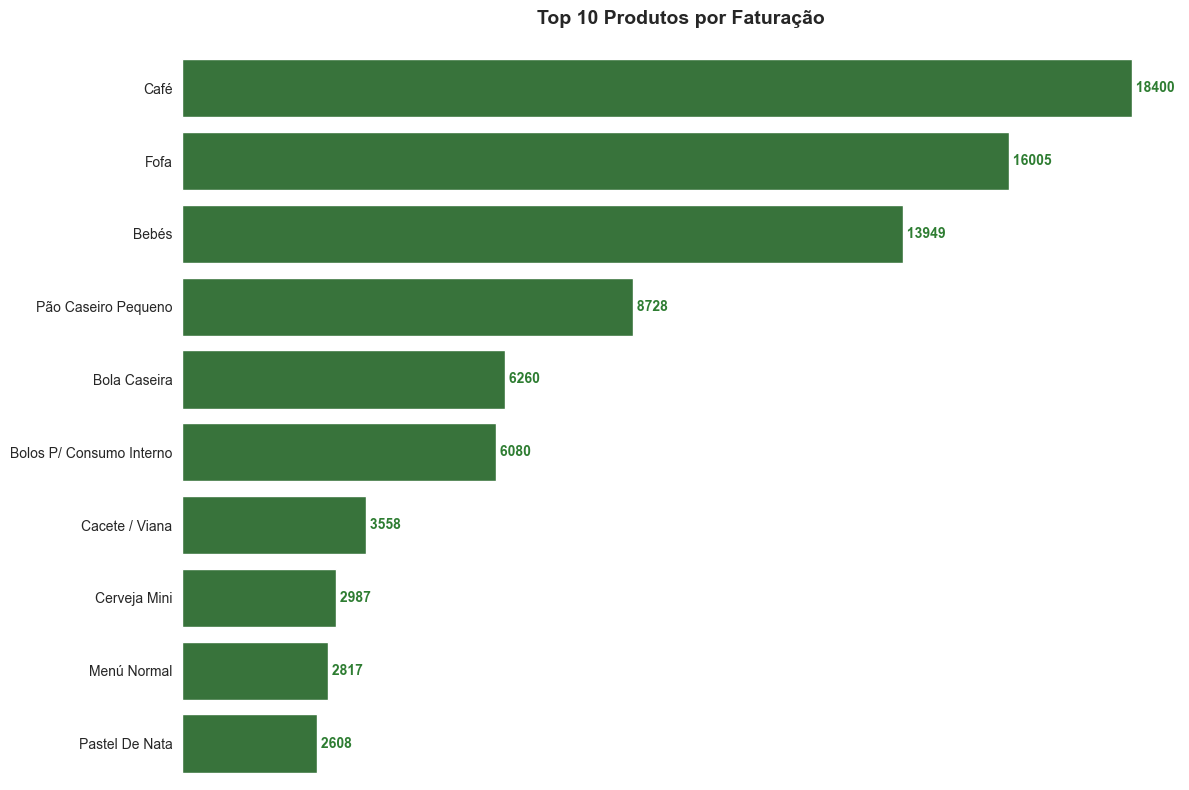

In [87]:
plt.figure(figsize=(12, 8))

# Criando o gráfico horizontal
bar_top = sns.barplot(
    data=top_10_quantidade, 
    x='Quantidade_Total', 
    y='Descrição', 
    color='#2E7D32'
)

# Adicionando os rótulos de valor à frente das barras
for p in bar_top.patches:
    width = p.get_width()
    bar_top.annotate(f' {width:,.0f}'.replace(',', ''),
                     (width, p.get_y() + p.get_height() / 2.),
                     va='center', fontsize=10, fontweight='bold', color='#2E7D32')

# Estética minimalista
ax = plt.gca()
ax.grid(False)
sns.despine(left=True, bottom=True)
ax.set_xticks([]) # Remove o eixo X (os números já estão nas barras)
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Top 10 Produtos por Faturação', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

Por dia da semana

In [47]:
df_sales['Dia_Semana'].value_counts()

Dia_Semana
5    13057
6    12844
4    12405
3    12247
1    11732
2    11692
0    11558
Name: count, dtype: int64

In [49]:
# Dicionário de tradução 
dias_pt = {
    0: 'Segunda', 1: 'Terça', 2: 'Quarta', 
    3: 'Quinta', 4: 'Sexta', 5: 'Sábado', 6: 'Domingo'
}

# Aplicando o map:
df_sales['Dia_Semana'] = df_sales['MovementStartTime'].dt.day_of_week.map(dias_pt)

# 2. Definindo a ordem lógica para o gráfico
ordem_dias = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
df_sales['Dia_Semana'] = pd.Categorical(df_sales['Dia_Semana'], categories=ordem_dias, ordered=True)

# 3. Agrupamento
df_semana = df_sales.groupby('Dia_Semana', observed=True).agg({
    'GrossValue': ['sum', 'mean']
}).reset_index()

df_semana.columns = ['Dia_Semana', 'Faturação_Total', 'Ticket_Médio']

In [50]:
df_semana.head()

,Dia_Semana,Faturação_Total,Ticket_Médio
0,Segunda,17751.72,1.535882
1,Terça,17273.52,1.472342
2,Quarta,17243.12,1.474779
3,Quinta,19003.90,1.551719
4,Sexta,19138.30,1.542789


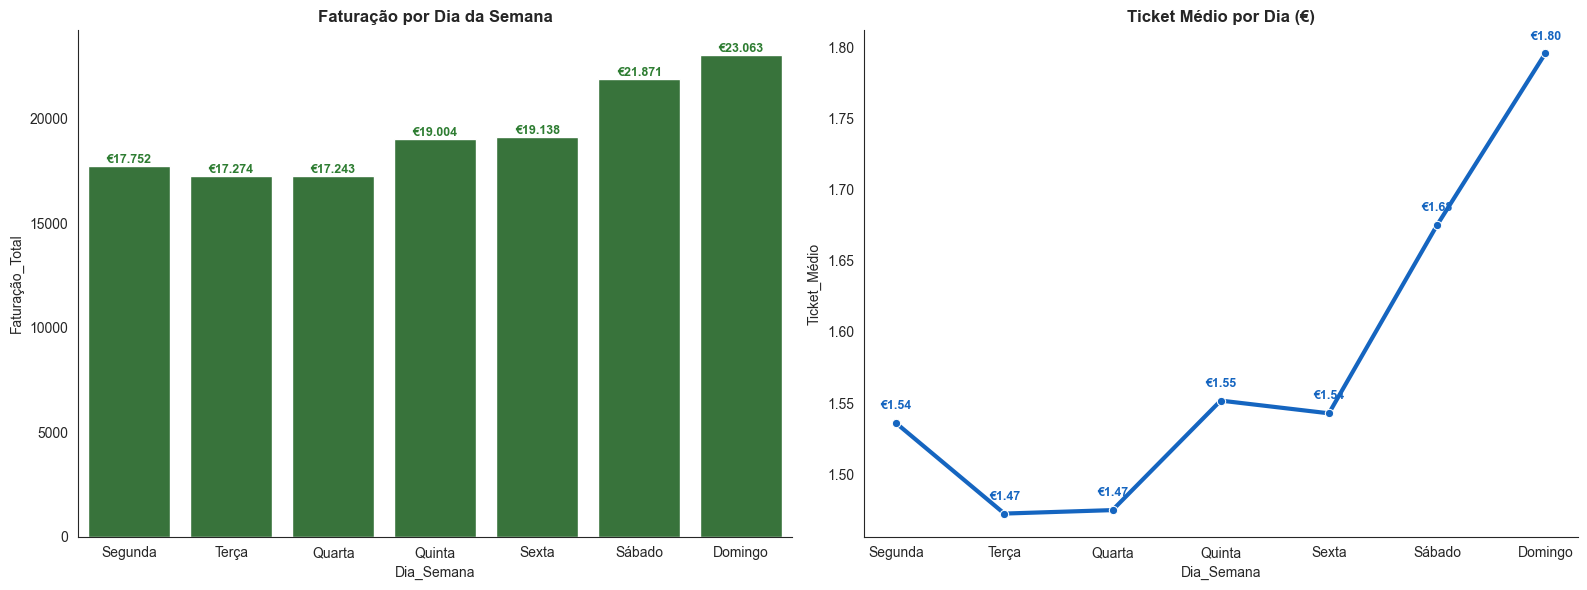

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Gráfico 1: Faturação Total (Barras - Verde) ---
sns.barplot(data=df_semana, x='Dia_Semana', y='Faturação_Total', ax=ax1, color='#2E7D32')
ax1.set_title('Faturação por Dia da Semana', fontsize=12, fontweight='bold')
ax1.grid(False)
sns.despine(ax=ax1)

# Rótulos nas barras
for p in ax1.patches:
    ax1.annotate(f'€{p.get_height():,.0f}'.replace(',', '.'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=9, fontweight='bold', color='#2E7D32')

# --- Gráfico 2: Ticket Médio (Linha - Azul) ---
# Usamos gráfico de linha para destacar a tendência/comportamento do cliente
sns.lineplot(data=df_semana, x='Dia_Semana', y='Ticket_Médio', ax=ax2, marker='o', color='#1565C0', linewidth=3)
ax2.set_title('Ticket Médio por Dia (€)', fontsize=12, fontweight='bold')
ax2.grid(False)
sns.despine(ax=ax2)

# Rótulos na linha
for x, y in zip(range(len(df_semana)), df_semana['Ticket_Médio']):
    ax2.annotate(f'€{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', 
                 fontsize=9, fontweight='bold', color='#1565C0')

plt.tight_layout()
plt.show()

Ticket médio

In [73]:
# Criando coluna de data pura (sem hora) 
df_sales['Data'] = df_sales['MovementStartTime'].dt.date
 
# Filtrar apenas a primeira linha de cada fatura
df_faturas = df_sales[df_sales['LineNumber'] == 1]

# Calcular estatísticas descritivas do valor total da fatura
stats = df_faturas['GrossTotal'].describe().round(2)
print(f"Estatísticas do Ticket Médio Diário:\n{stats}")

Estatísticas do Ticket Médio Diário:
count    43127.00
mean         2.98
std          2.74
min          0.00
25%          1.35
50%          2.10
75%          3.84
max         87.93
Name: GrossTotal, dtype: float64


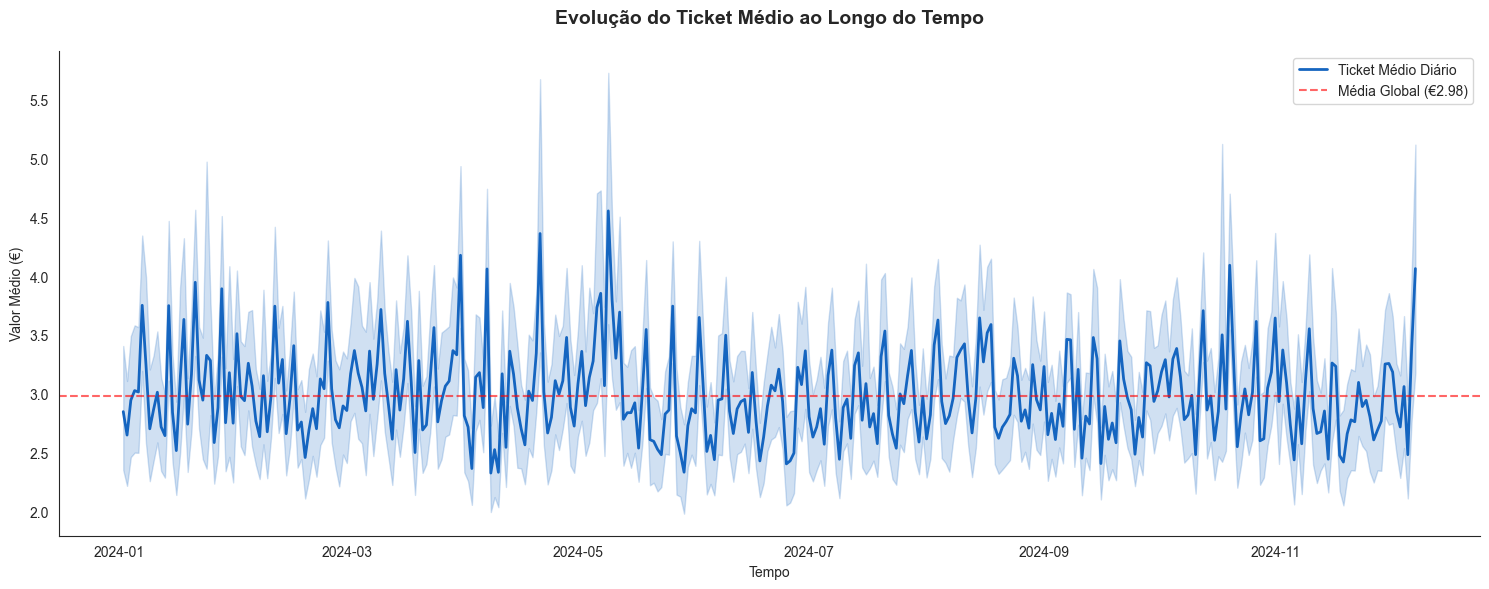

In [74]:
plt.figure(figsize=(15, 6))

# Gráfico de linha principal
sns.lineplot(data=df_faturas, x='Data', y='GrossTotal', color='#1565C0', linewidth=2, label='Ticket Médio Diário')

# Linha horizontal de referência (Média Global)
media_global = df_faturas['GrossTotal'].mean()
plt.axhline(media_global, color='red', linestyle='--', alpha=0.6, label=f'Média Global (€{media_global:.2f})')

# Estética minimalista
plt.title('Evolução do Ticket Médio ao Longo do Tempo', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Valor Médio (€)')
plt.xlabel('Tempo')
sns.despine()
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

In [76]:
# Destacando a linha com o maior e o menor ticket médio
dia_max = df_faturas.loc[df_faturas['GrossTotal'].idxmax()]
dia_min = df_faturas.loc[df_faturas['GrossTotal'].idxmin()]

print(f"Melhor Dia: {dia_max['Data']} com €{dia_max['GrossTotal']:.2f}")
print(f"Pior Dia: {dia_min['Data']} com €{dia_min['GrossTotal']:.2f}")

Melhor Dia: 2024-10-18 com €87.93
Pior Dia: 2024-01-02 com €0.00


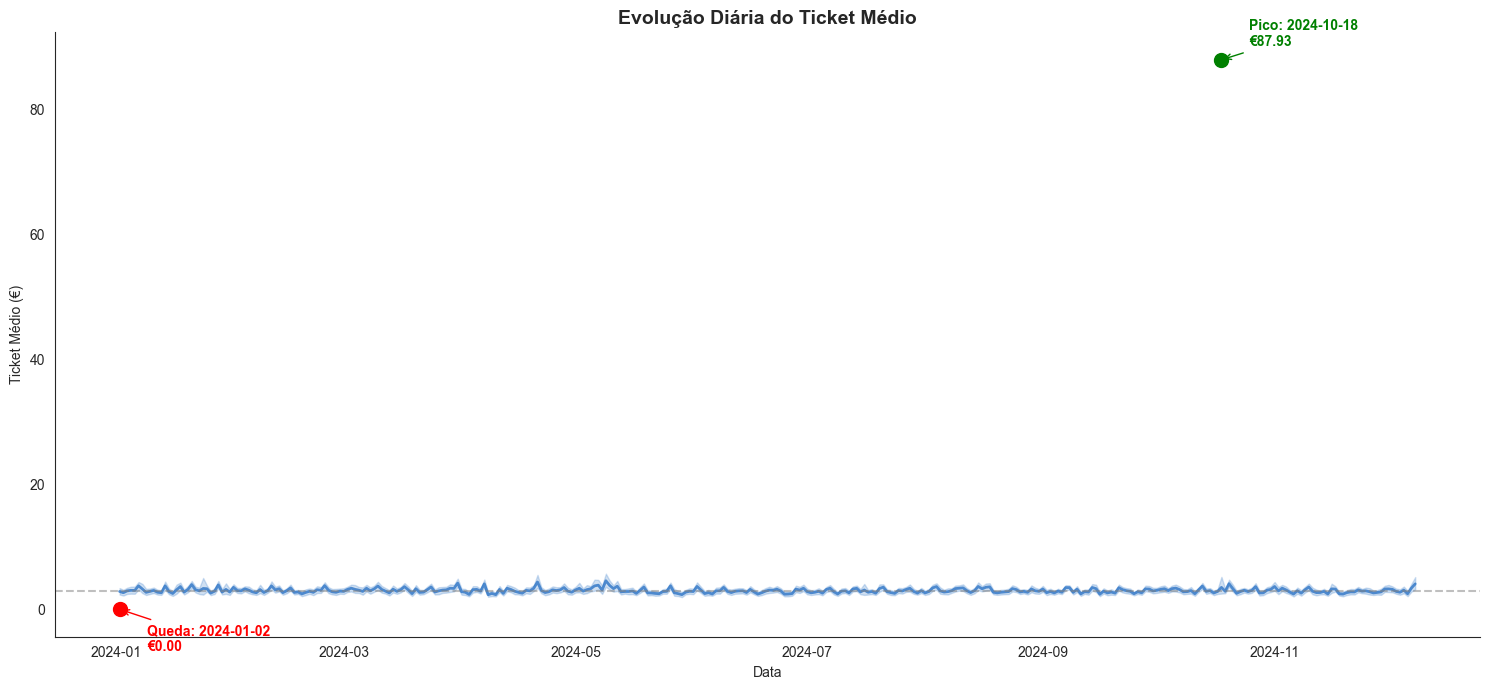

In [77]:
plt.figure(figsize=(15, 7))

# Gráfico de linha principal
sns.lineplot(data=df_faturas, x='Data', y='GrossTotal', color='#1565C0', linewidth=2, alpha=0.7)

# --- DESTAQUE: MÁXIMO ---
plt.scatter(dia_max['Data'], dia_max['GrossTotal'], color='green', s=100, zorder=5, label='Máximo Histórico')
plt.annotate(f"Pico: {dia_max['Data']}\n€{dia_max['GrossTotal']:.2f}", 
             xy=(dia_max['Data'], dia_max['GrossTotal']),
             xytext=(20, 10), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='green'),
             fontsize=10, fontweight='bold', color='green')

# --- DESTAQUE: MÍNIMO ---
plt.scatter(dia_min['Data'], dia_min['GrossTotal'], color='red', s=100, zorder=5, label='Mínimo Histórico')
plt.annotate(f"Queda: {dia_min['Data']}\n€{dia_min['GrossTotal']:.2f}", 
             xy=(dia_min['Data'], dia_min['GrossTotal']),
             xytext=(20, -30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, fontweight='bold', color='red')

# Linha da média para contexto
plt.axhline(df_faturas['GrossTotal'].mean(), color='gray', linestyle='--', alpha=0.5)

# Limpeza visual
plt.title('Evolução Diária do Ticket Médio', fontsize=14, fontweight='bold')
plt.ylabel('Ticket Médio (€)')
sns.despine()
plt.grid(False)

plt.tight_layout()
plt.show()

<Axes: xlabel='Data', ylabel='Media_Movel'>

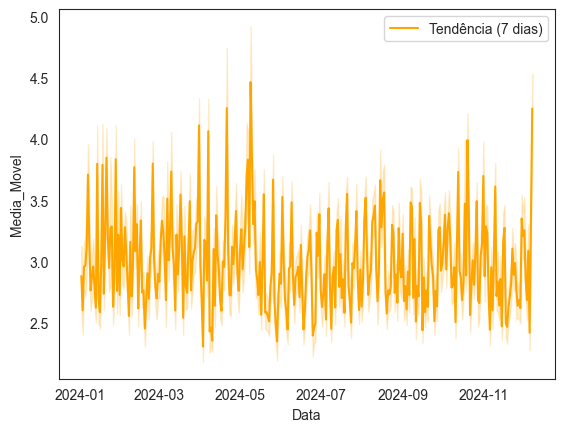

In [78]:
# Opcional: Média móvel para ver a tendência limpa
df_faturas['Media_Movel'] = df_faturas['GrossTotal'].rolling(window=7).mean()
sns.lineplot(data=df_faturas, x='Data', y='Media_Movel', color='orange', label='Tendência (7 dias)')

In [79]:
df_faturas.head()

,SourceID27,MovementStartTime,LineNumber,ProductCode40,ProductDescription41,Quantity,UnitOfMeasure,UnitPrice,TaxPointDate,CreditAmount,...,PaymentDate,GrossValue,Hora,Dia,Dia_Semana,Mês,Ano,Data,Categoria,Media_Movel
0,EB,2024-01-02 11:21:00,1.0,1007,Pão Caseiro Pequeno,2.0,Unidade,1.18,2024-01-02,2.36,...,2024-01-02,2.50,11,2,Terça,1,2024,2024-01-02,Pão,NaN
1,EB,2024-01-02 11:26:00,1.0,1442,Cacete / Viana,5.0,Unidade,0.45,2024-01-02,2.25,...,2024-01-02,2.25,11,2,Terça,1,2024,2024-01-02,Pão,NaN
2,EB,2024-01-02 11:32:00,1.0,1013,Bola Caseira,2.0,Unidade,0.45,2024-01-02,0.90,...,2024-01-02,0.90,11,2,Terça,1,2024,2024-01-02,Pão,NaN
3,EB,2024-01-02 11:34:00,1.0,1007,Pão Caseiro Pequeno,1.0,Unidade,1.18,2024-01-02,1.18,...,2024-01-02,1.25,11,2,Terça,1,2024,2024-01-02,Pão,NaN
5,EB,2024-01-02 11:35:00,1.0,1007,Pão Caseiro Pequeno,1.0,Unidade,1.18,2024-01-02,1.18,...,2024-01-02,1.25,11,2,Terça,1,2024,2024-01-02,Pão,NaN


### Parte 5: Insights e Recomendações

### Insights:

 1. A análise evidenciou que uma pequena parcela dos produtos como sendo responsável pela maior parte da receita total, caracterizando um efeito semelhante ao princípio de Pareto. Isso indica alta dependência de produtos-chave para sustentação do faturamento.
***Implicação:*** vulnerabilidade do negócio a variações de procura, preço ou ruptura de estoque desses itens.

2. Em contrapartida com a alta faturação para uma parcela pequena de produtos, há parte do portfólio que apresenta baixa frequência de venda e contribuição contribui muito pouco para a receita, mas ainda consome espaço produtivo e logístico.
***Implicação:*** possível ineficiência na alocação de recursos.

3. Observou-se variação sistemática nas vendas ao longo do tempo, com picos concentrados em determinados períodos (dias da semana / meses específicos). A saber, sábados e domingos como os melhores dias de faturação da semana, e os meses de verão / férias como o melhor período de faturação do ano. 
***Implicação:*** existe oportunidade de planejamento mais eficiente de produção e estoque com base em padrões previsíveis.

4. O ticket médio apresenta estabilidade ao longo do período, sugerindo comportamento de consumo previsível. Entretanto, a receita total é fortemente influenciada pela frequência de compras. 
***Implicação:*** estratégias de retenção podem gerar maior impacto do que aumento pontual de preços.

### Recomendações: 

1. Garantir disponibilidade contínua dos produtos de maior receita, com controle rigoroso de estoque e possível otimização de precificação.
2. Avaliar descontinuação, reformulação ou reposicionamento dos produtos com baixa saída, reduzindo complexidade operacional.
3. Ajustar produção, escala de equipe e compras de insumos com base nos padrões temporais identificados, visando redução de desperdício e aumento de eficiência.

---
### Desafios Extra

Desafio 1: Análise de Categorias de Produtos

In [58]:
# Definindo as condições para a categorização
desc = df_sales['ProductDescription41'].str.lower()

condicoes = [
    desc.str.contains('pão|broa|baguete|carcaça|bola|cacete|bebé', na=False),
    desc.str.contains('bolo|pastel|torta|fofa|croissant|queque|murca|bifana|beijinho|biscuit|filhó|suspiro|folar|menu|hamburguer|sobremesa|rissois|sopa|linguas|pizza|cavaca|ferradura|cosco', na=False),
    desc.str.contains('café|água|sumo|coca|cerveja|chá|leite|abatanado|cappuccino|cevada|descafeinado|descafeínado|compal|lipton|galão|pepsi|ucal|iced|iogurte', na=False)
]

categorias = ['Pão', 'Pastelaria', 'Bebidas']

# Criar a coluna 'Categoria', definindo 'Outros' como padrão
df_sales['Categoria'] = np.select(condicoes, categorias, default='Mercearia')

In [59]:
df_cat = df_sales.groupby('Categoria').agg({
    'GrossValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Calculando a percentagem de Faturação
total_faturacao = df_cat['GrossValue'].sum()
df_cat['Percentual'] = (df_cat['GrossValue'] / total_faturacao) * 100

print(df_cat.round(2).sort_values('GrossValue', ascending=False))

    Categoria  GrossValue  Quantity  Percentual
1   Mercearia    43500.24  21253.78       32.14
3         Pão    33806.07  44067.00       24.98
0     Bebidas    31070.77  33327.00       22.96
2  Pastelaria    26967.96  29366.65       19.93


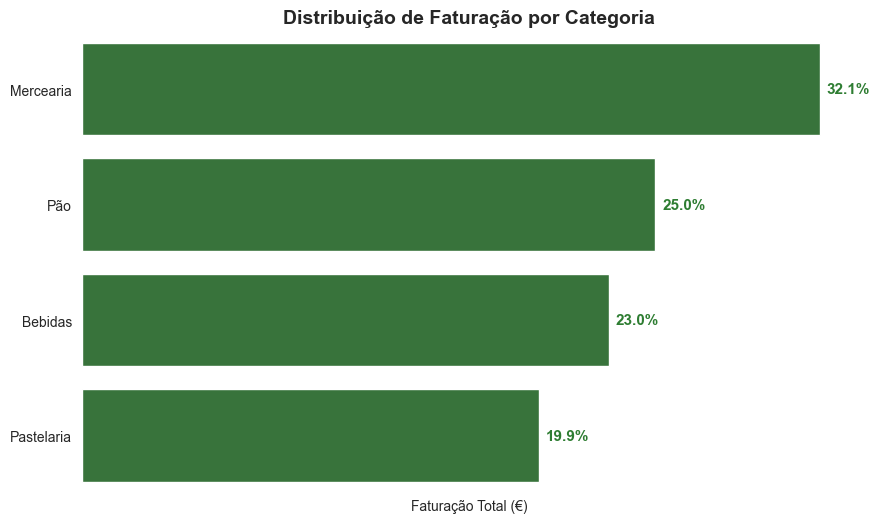

In [60]:
plt.figure(figsize=(10, 6))

# Gráfico de Barras para Faturação por Categoria
ax = sns.barplot(data=df_cat.sort_values('GrossValue', ascending=False), 
                 x='GrossValue', y='Categoria', color='#2E7D32')

# Adicionar rótulos percentuais
for i, p in enumerate(ax.patches):
    perc = df_cat.sort_values('GrossValue', ascending=False)['Percentual'].values[i]
    ax.annotate(f'{perc:.1f}%', 
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                va='center', xytext=(5, 0), textcoords='offset points',
                fontsize=11, fontweight='bold', color='#2E7D32')

plt.title('Distribuição de Faturação por Categoria', fontsize=14, fontweight='bold')
plt.xlabel('Faturação Total (€)')
plt.ylabel('')
sns.despine(left=True, bottom=True)
ax.set_xticks([])
plt.show()

Desafio 2: Análise ABC de Produtos

In [90]:
# 1. Agrupando e ordenando por produto 
df_abc = df_sales.groupby('ProductDescription41')['GrossValue'].sum().reset_index()
df_abc = df_abc.sort_values(by='GrossValue', ascending=False).reset_index(drop=True)

# 2. Calculando Faturação Acumulada e Percentagem Acumulada
df_abc['Faturacao_Acumulada'] = df_abc['GrossValue'].cumsum()
total_faturacao = df_abc['GrossValue'].sum()
df_abc['Perc_Acumulada'] = (df_abc['Faturacao_Acumulada'] / total_faturacao) * 100

# 3. Classificando em A, B e C
def classificar_abc(percentagem):
    if percentagem <= 80:
        return 'A'
    elif percentagem <= 95:
        return 'B'
    else:
        return 'C'

df_abc['Classe'] = df_abc['Perc_Acumulada'].apply(classificar_abc)

# Ver resumo das classes
resumo_abc = df_abc.groupby('Classe').agg({
    'ProductDescription41': 'count',
    'GrossValue': 'sum'
}).rename(columns={'ProductDescription41': 'Qtd_Produtos', 'GrossValue': 'Faturação_Total'})
print(resumo_abc)

        Qtd_Produtos  Faturação_Total
Classe                               
A                 33        108029.51
B                 67         20475.98
C                322          6839.55


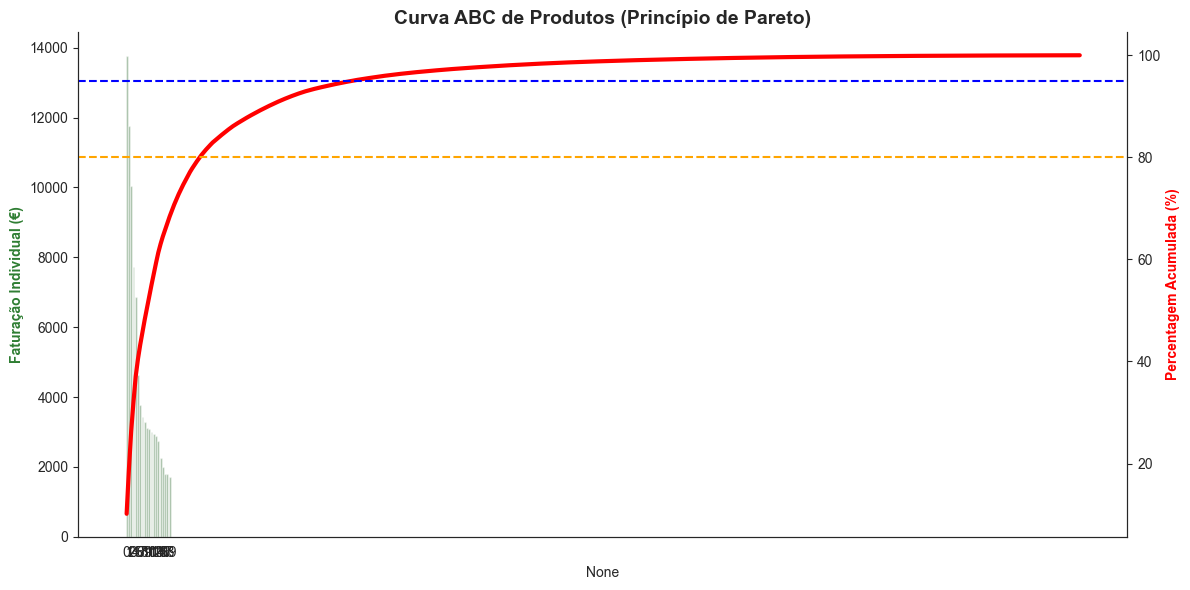

In [62]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de Barras (opcional, para os top 20 para não poluir)
sns.barplot(x=df_abc.index[:20], y='GrossValue', data=df_abc.iloc[:20], ax=ax1, color='#2E7D32', alpha=0.5)
ax1.set_ylabel('Faturação Individual (€)', color='#2E7D32', fontweight='bold')

# Criar o segundo eixo para a linha acumulada
ax2 = ax1.twinx()
sns.lineplot(x=range(len(df_abc)), y='Perc_Acumulada', data=df_abc, ax=ax2, color='red', linewidth=3)
ax2.set_ylabel('Percentagem Acumulada (%)', color='red', fontweight='bold')

# Adicionar as linhas de corte (Thresholds)
ax2.axhline(80, color='orange', linestyle='--', label='Corte A (80%)')
ax2.axhline(95, color='blue', linestyle='--', label='Corte B (95%)')

# Estética
plt.title('Curva ABC de Produtos (Princípio de Pareto)', fontsize=14, fontweight='bold')
ax1.grid(False)
ax2.grid(False)
sns.despine(top=True, right=False)

plt.tight_layout()
plt.show()

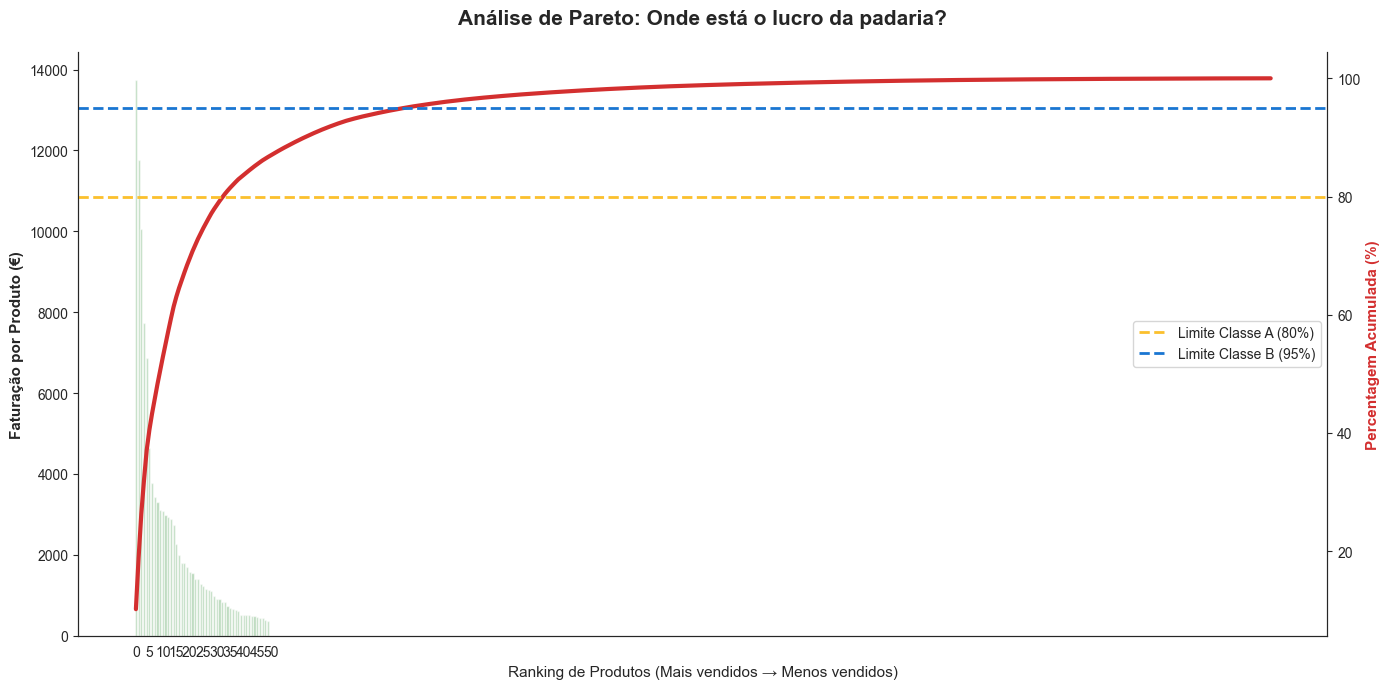

In [63]:
# 1. Preparar os dados (mantendo o que já fizemos)
df_abc_plot = df_abc.copy()

# 2. Vamos plotar apenas os primeiros 50 produtos para o gráfico não "sufocar"
# Mas a linha vermelha continuará a representar o acumulado de TODOS
df_top_abc = df_abc_plot.head(50) 

fig, ax1 = plt.subplots(figsize=(14, 7))

# --- Gráfico de Barras (Faturação Individual) ---
# Usamos uma cor suave para as barras não brigarem com a linha
sns.barplot(x=df_top_abc.index, y='GrossValue', data=df_top_abc, ax=ax1, color='#81c784', alpha=0.6)

# --- Eixo 2: Percentagem Acumulada (Linha de Pareto) ---
ax2 = ax1.twinx()
sns.lineplot(x=range(len(df_abc_plot)), y='Perc_Acumulada', data=df_abc_plot, ax=ax2, color='#d32f2f', linewidth=3)

# --- Linhas de Corte (Thresholds) ---
ax2.axhline(80, color='#fbc02d', linestyle='--', linewidth=2, label='Limite Classe A (80%)')
ax2.axhline(95, color='#1976d2', linestyle='--', linewidth=2, label='Limite Classe B (95%)')

# --- Melhorando os Eixos ---
ax1.set_xlabel('Ranking de Produtos (Mais vendidos → Menos vendidos)', fontsize=11)
ax1.set_ylabel('Faturação por Produto (€)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Percentagem Acumulada (%)', fontsize=11, fontweight='bold', color='#d32f2f')

# Limpar o Eixo X: Mostrar apenas números de 5 em 5 para não amontoar
ax1.set_xticks(range(0, 51, 5)) 
ax1.set_xticklabels(range(0, 51, 5))

# Título e Legenda
plt.title('Análise de Pareto: Onde está o lucro da padaria?', fontsize=15, fontweight='bold', pad=20)
ax2.legend(loc='center right')

# Remover grades para o look minimalista
ax1.grid(False)
ax2.grid(False)
sns.despine(top=True, right=False)

plt.tight_layout()
plt.show()

Desafio 3: Dashboard Executivo

In [64]:
# KPIs
faturacao_total = df_sales['GrossValue'].sum()
ticket_medio_geral = df_sales['GrossValue'].mean()
total_transacoes = len(df_sales)
qtd_produtos_distintos = df_sales['ProductDescription41'].nunique()

# Preparar dados para os gráficos (garantindo que as colunas existam)
df_mensal_dash = df_sales.resample('ME', on='MovementStartTime')['GrossValue'].sum().reset_index()
df_mensal_dash['Mes_Nome'] = df_mensal_dash['MovementStartTime'].dt.month.map(meses_pt)

top_10_dash = df_sales.groupby('ProductDescription41')['GrossValue'].sum().nlargest(10).reset_index()

C:\Users\karen\AppData\Local\Temp\ipykernel_33772\3684852579.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_semana, x='Dia_Semana', y='Faturação_Total', palette='viridis', ax=ax3)
C:\Users\karen\AppData\Local\Temp\ipykernel_33772\3684852579.py:48: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.92])
C:\Users\karen\AppData\Local\Temp\ipykernel_33772\3684852579.py:48: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.92])
C:\Users\karen\AppData\Local\Temp\ipykernel_33772\3684852579.py:48: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.92])
C:\Users\karen\AppData\Local\Temp\ipykernel_33772\3684852579.py:48: UserWarning: Glyph 128176 (\N{

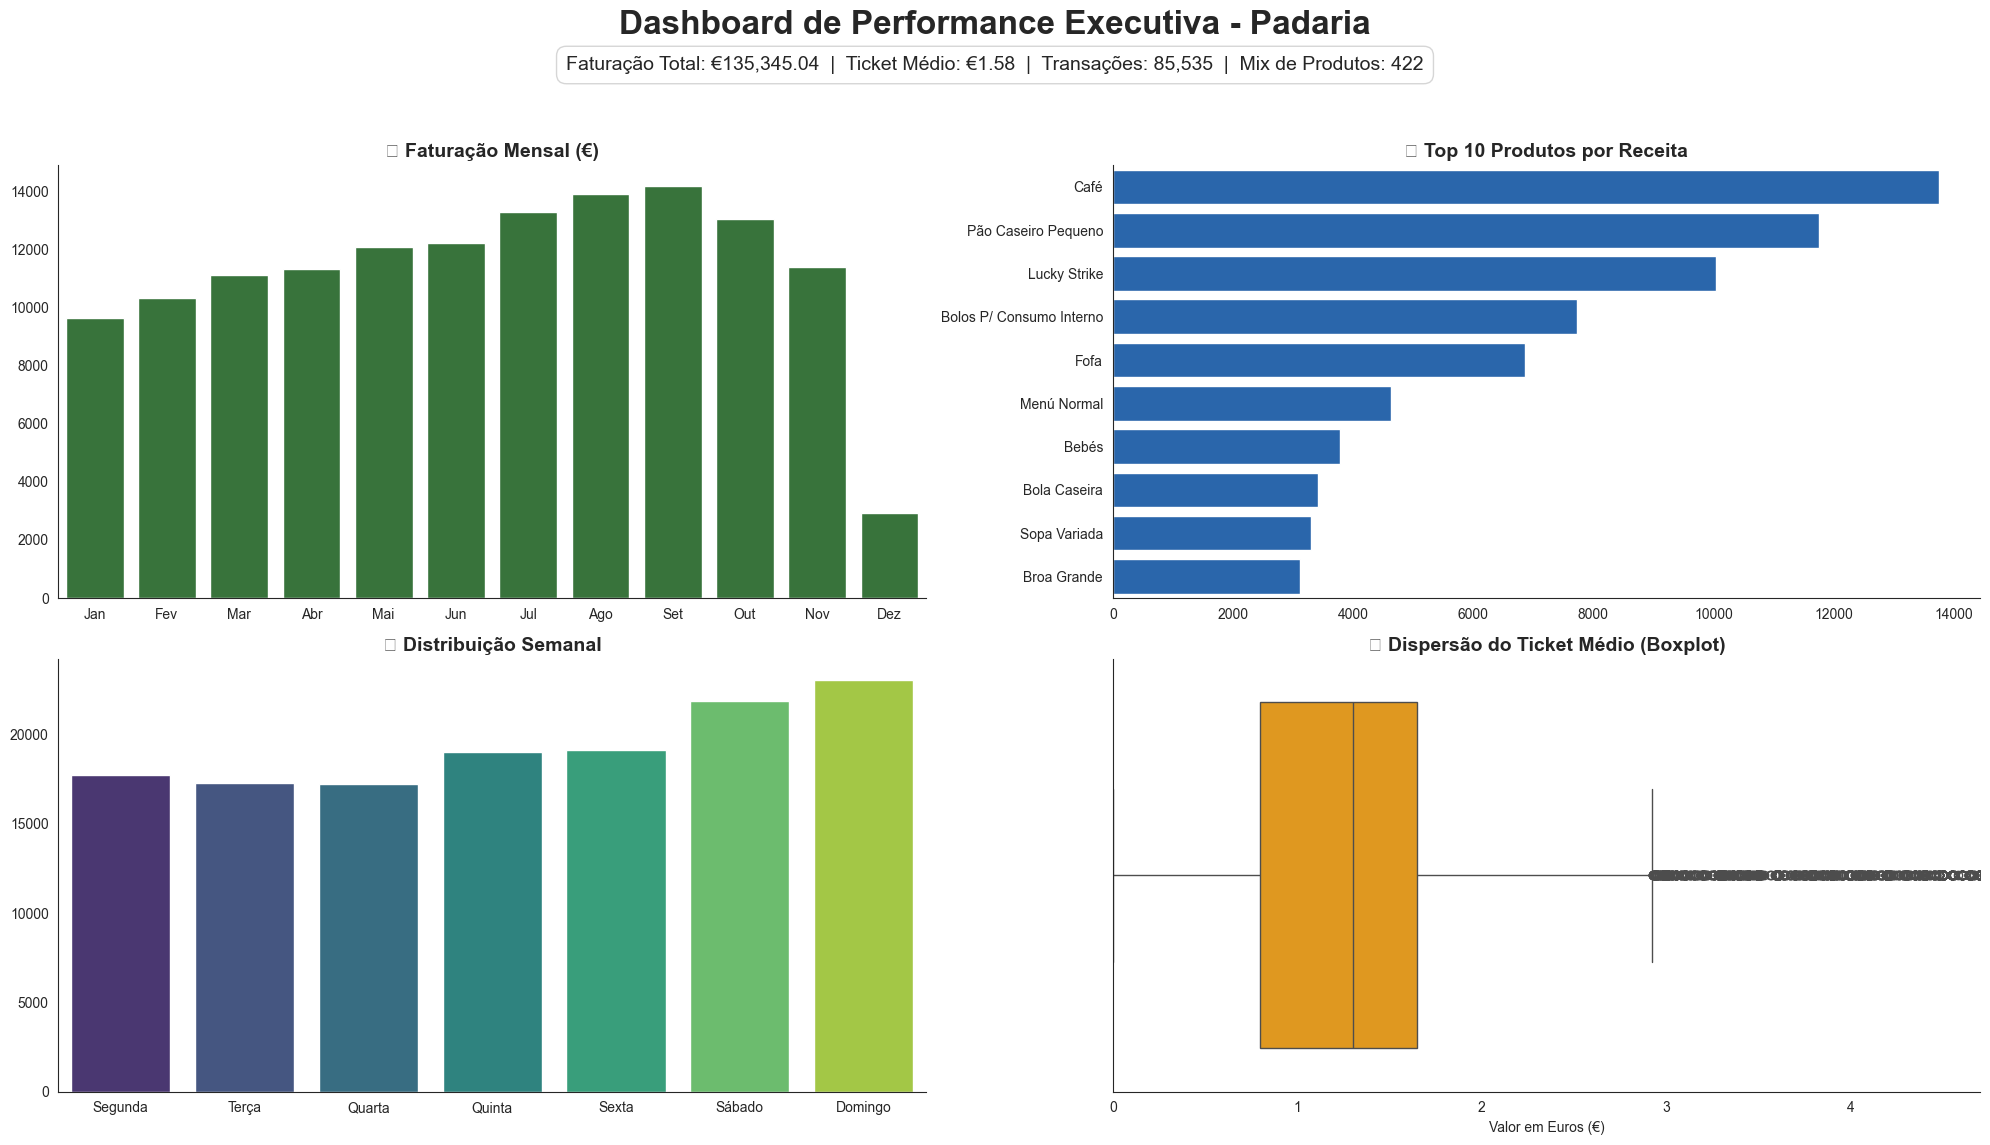

In [65]:
# Configuração da figura e layout
fig = plt.figure(figsize=(20, 12))
fig.suptitle('Dashboard de Performance Executiva - Padaria', fontsize=24, fontweight='bold', y=0.98)

# --- QUADRANTE 1: Evolução Mensal (Superior Esquerdo) ---
ax1 = plt.subplot(2, 2, 1)
sns.barplot(data=df_mensal_dash, x='Mes_Nome', y='GrossValue', color='#2E7D32', ax=ax1)
ax1.set_title('📈 Faturação Mensal (€)', fontsize=14, fontweight='bold')
ax1.set_xlabel('')
ax1.set_ylabel('')
sns.despine(ax=ax1)

# --- QUADRANTE 2: Top 10 Produtos (Superior Direito) ---
ax2 = plt.subplot(2, 2, 2)
sns.barplot(data=top_10_dash, x='GrossValue', y='ProductDescription41', color='#1565C0', ax=ax2)
ax2.set_title('🏆 Top 10 Produtos por Receita', fontsize=14, fontweight='bold')
ax2.set_xlabel('')
ax2.set_ylabel('')
sns.despine(ax=ax2)

# --- QUADRANTE 3: Vendas por Dia da Semana (Inferior Esquerdo) ---
ax3 = plt.subplot(2, 2, 3)
# (Usando o df_semana que criamos anteriormente)
sns.barplot(data=df_semana, x='Dia_Semana', y='Faturação_Total', palette='viridis', ax=ax3)
ax3.set_title('📅 Distribuição Semanal', fontsize=14, fontweight='bold')
ax3.set_xlabel('')
ax3.set_ylabel('')
sns.despine(ax=ax3)

# --- QUADRANTE 4: Distribuição de Ticket Médio (Inferior Direito) ---
ax4 = plt.subplot(2, 2, 4)
sns.boxplot(x=df_sales['GrossValue'], color='#FFA000', ax=ax4)
# Limitar o X para ignorar outliers extremos e ver a "caixa" principal (ex: até €20)
ax4.set_xlim(0, df_sales['GrossValue'].quantile(0.95)) 
ax4.set_title('💰 Dispersão do Ticket Médio (Boxplot)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Valor em Euros (€)')
sns.despine(ax=ax4)

# --- BLOCO DE KPIs (Texto no topo) ---
# Adicionando um subtítulo com os números principais
kpi_text = (f"Faturação Total: €{faturacao_total:,.2f}  |  "
            f"Ticket Médio: €{ticket_medio_geral:.2f}  |  "
            f"Transações: {total_transacoes:,}  |  "
            f"Mix de Produtos: {qtd_produtos_distintos}")
fig.text(0.5, 0.93, kpi_text, ha='center', fontsize=14, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='#cccccc', boxstyle='round,pad=0.5'))

plt.tight_layout(rect=[0, 0.03, 1, 0.92])
plt.show()

Desafio 4: Identificar Anomalias

In [66]:
# Extrair a hora
df_sales['Hora'] = df_sales['MovementStartTime'].dt.hour

# Agrupar para ver o movimento por hora
vendas_por_hora = df_sales.groupby('Hora').size()

# Investigar vendas entre as 23h e as 05h
madrugada = df_sales[(df_sales['Hora'] >= 23) | (df_sales['Hora'] <= 5)]
print(f"Total de vendas na madrugada: {len(madrugada)}")

Total de vendas na madrugada: 214


In [67]:
# Calcular média e desvio padrão por produto
stats_precos = df_sales.groupby('ProductDescription41')['GrossValue'].agg(['mean', 'std']).reset_index()

# Mesclar de volta ao dataframe original
df_anomalia = df_sales.merge(stats_precos, on='ProductDescription41')

# Calcular o Z-Score: (Valor - Média) / Desvio Padrão
df_anomalia['z_score'] = (df_anomalia['GrossValue'] - df_anomalia['mean']) / df_anomalia['std']

# Identificar Outliers (z-score > 3 ou < -3)
outliers_preco = df_anomalia[df_anomalia['z_score'].abs() > 3]
print(f"Produtos com preço anómalo: {len(outliers_preco)}")

Produtos com preço anómalo: 1440


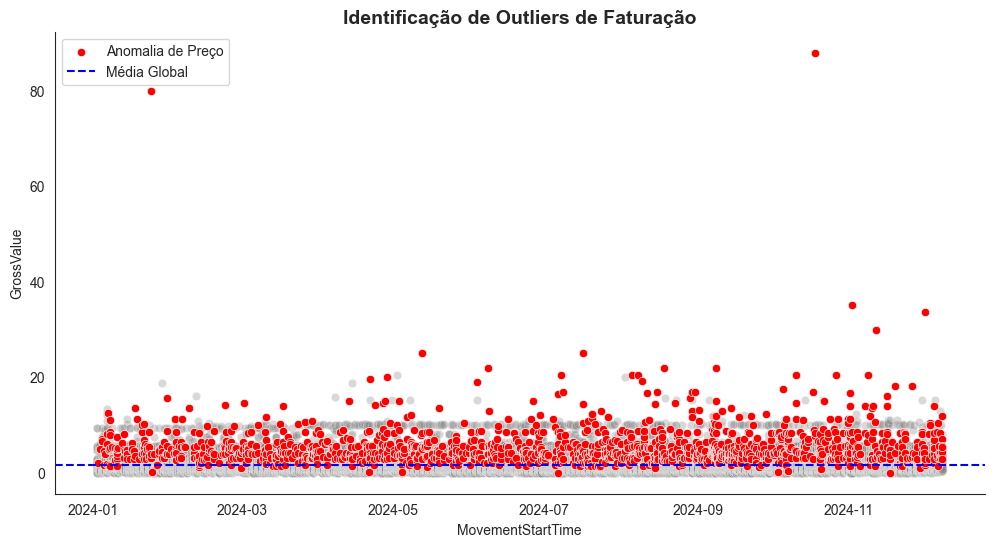

In [68]:
plt.figure(figsize=(12, 6))

# Plotar todas as vendas
sns.scatterplot(data=df_sales, x='MovementStartTime', y='GrossValue', alpha=0.3, color='gray')

# Destacar os outliers em vermelho
if not outliers_preco.empty:
    sns.scatterplot(data=outliers_preco, x='MovementStartTime', y='GrossValue', color='red', label='Anomalia de Preço')

plt.title('Identificação de Outliers de Faturação', fontsize=14, fontweight='bold')
plt.axhline(df_sales['GrossValue'].mean(), color='blue', linestyle='--', label='Média Global')
plt.legend()
sns.despine()
plt.show()

### Sumário Executivo

Clique aqui para acessar o [Sumário Executivo](sumario_executivo_padaria.ipynb).